# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Obtaining and organizing stock data from Yahoo Finance

In [2]:
# import data reader package
import pandas_datareader as pdr

# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
    # read the data
    #data = pdr.data.DataReader(ticker, 'GOLD', start, end)
    data = pdr.get_data_yahoo(ticker, start, end)
    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

In [3]:
# request the three years of data for NEM
start = datetime(2015, 2, 11)
end = datetime(2020, 5, 1)
get_stock_data("NEM", start, end)[:5]

           Ticker       High        Low   Open      Close  \
Date                                                        
2015-02-11    NEM  24.600000  24.090000  24.43  24.139999   
2015-02-12    NEM  24.700001  24.110001  24.41  24.510000   
2015-02-13    NEM  25.059999  24.660000  24.75  24.780001   
2015-02-17    NEM  24.600000  24.170000  24.34  24.190001   
2015-02-18    NEM  24.850000  23.850000  24.15  24.740000   

               Volume  Adj Close  
Date                              
2015-02-11  5087300.0  22.308504  
2015-02-12  4488600.0  22.650434  
2015-02-13  5186800.0  22.899950  
2015-02-17  6205200.0  22.354717  
2015-02-18  8069900.0  22.862988  

In [4]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [5]:
# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks(
    ['NEM','FDVV','TLT','SAGE','IEFA','GOLD','FCNTX','JGH','AAXJ','FREL','SINA','WRB','SNP','CHL','CMA','VLO','SANM','SLVP','HDV','T'],
    start, end)

In [6]:
# take a peek at the data for NEM
raw['NEM'][:5]

           Ticker       High        Low   Open      Close  \
Date                                                        
2015-02-11    NEM  24.600000  24.090000  24.43  24.139999   
2015-02-12    NEM  24.700001  24.110001  24.41  24.510000   
2015-02-13    NEM  25.059999  24.660000  24.75  24.780001   
2015-02-17    NEM  24.600000  24.170000  24.34  24.190001   
2015-02-18    NEM  24.850000  23.850000  24.15  24.740000   

               Volume  Adj Close  
Date                              
2015-02-11  5087300.0  22.308504  
2015-02-12  4488600.0  22.650434  
2015-02-13  5186800.0  22.899950  
2015-02-17  6205200.0  22.354717  
2015-02-18  8069900.0  22.862988  

In [7]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [8]:
# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker           AAXJ        CHL        CMA  ...  \
Date                                         ...   
2015-02-11  62.419998  66.620003  45.250000  ...   
2015-02-12  63.169998  68.919998  46.520000  ...   
2015-02-13  63.660000  68.699997  46.419998  ...   
2015-02-17  63.509998  68.709999  46.630001  ...   
2015-02-18  63.520000  68.139999  45.570000  ...   

Ticker             TLT        VLO        WRB  
Date                                          
2015-02-11  129.949997  55.360001  33.299999  
2015-02-12  129.520004  56.549999  33.459999  
2015-02-13  128.190002  58.599998  33.513332  
2015-02-17  126.260002  58.730000  33.506668  
2015-02-18  127.010002  59.270000  33.526669  

[5 rows x 20 columns]

# Plotting time-series prices

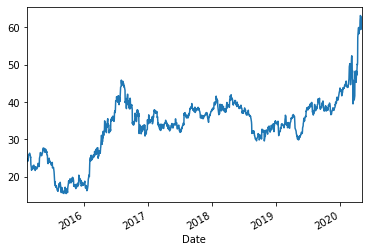

In [9]:
# plot the closing prices of NEM
close_px['NEM'].plot();

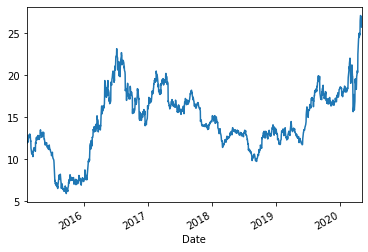

In [10]:
# plot the closing prices of GOLD
close_px['GOLD'].plot();

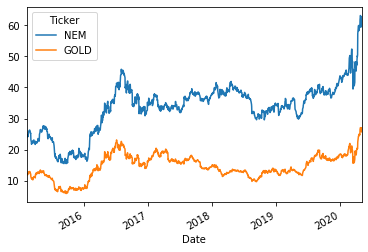

In [11]:
# plot MSFT vs AAPL on the same chart
close_px[['NEM', 'GOLD']].plot();

In [12]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker           AAXJ        CHL        CMA  ...  \
Date                                         ...   
2020-04-27   607700.0  1297600.0  3223300.0  ...   
2020-04-28  1952700.0  1135900.0  3096100.0  ...   
2020-04-29  2189500.0  1479000.0  3641500.0  ...   
2020-04-30   975000.0  1380600.0  2554400.0  ...   
2020-05-01   934600.0  1265100.0  2420800.0  ...   

Ticker             TLT        VLO        WRB  
Date                                          
2020-04-27   9039500.0  3813900.0   844700.0  
2020-04-28   9905400.0  4570900.0  1038200.0  
2020-04-29   8619600.0  9892400.0   857100.0  
2020-04-30  11606100.0  6676400.0   841600.0  
2020-05-01  10208600.0  4667100.0   666000.0  

[5 rows x 20 columns]

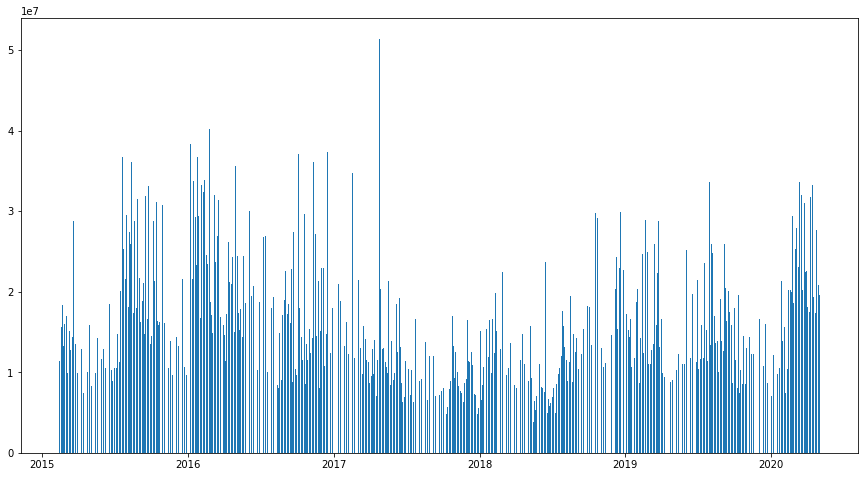

In [13]:
# plot the volume for MSFT
gold_volume = volumes[["GOLD"]]
plt.bar(gold_volume.index, gold_volume["GOLD"])
plt.gcf().set_size_inches(15,8)

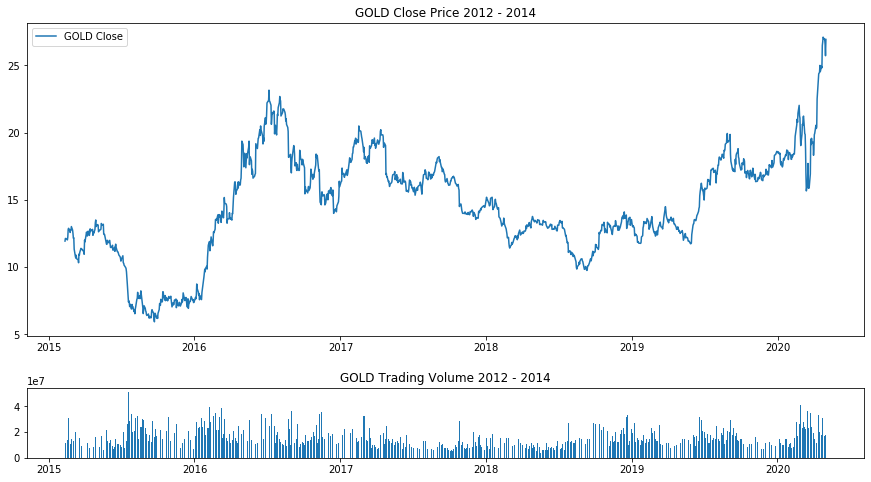

In [14]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['GOLD'].index, close_px['GOLD'], 
         label='GOLD Close')
plt.title('GOLD Close Price 2012 - 2014')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(gold_volume.index, gold_volume['GOLD'])
plt.title('GOLD Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating simple daily percentage change

In [15]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker          AAXJ       CHL       CMA  ...       TLT  \
Date                                      ...             
2015-02-11       NaN       NaN       NaN  ...       NaN   
2015-02-12  0.012015  0.034524  0.028066  ... -0.003309   
2015-02-13  0.007757 -0.003192 -0.002150  ... -0.010269   
2015-02-17 -0.002356  0.000146  0.004524  ... -0.015056   
2015-02-18  0.000157 -0.008296 -0.022732  ...  0.005940   

Ticker           VLO       WRB  
Date                            
2015-02-11       NaN       NaN  
2015-02-12  0.021496  0.004805  
2015-02-13  0.036251  0.001594  
2015-02-17  0.002218 -0.000199  
2015-02-18  0.009195  0.000597  

[5 rows x 20 columns]

In [16]:
# check the percentage on 2012-01-05
close_px.loc['2017-01-05']['GOLD'] / \
    close_px.loc['2017-01-04']['GOLD'] -1

0.05914641727229841

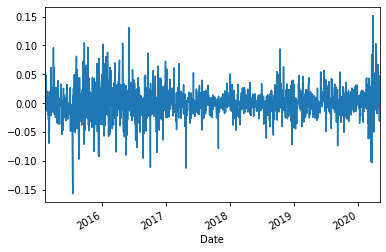

In [17]:
# plot daily percentage change for GOLD
daily_pc["GOLD"].plot();

# Calculating simple daily cumulative returns

In [18]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker          AAXJ       CHL       CMA  ...       TLT  \
Date                                      ...             
2015-02-11       NaN       NaN       NaN  ...       NaN   
2015-02-12  1.012015  1.034524  1.028066  ...  0.996691   
2015-02-13  1.019865  1.031222  1.025856  ...  0.986456   
2015-02-17  1.017462  1.031372  1.030497  ...  0.971605   
2015-02-18  1.017623  1.022816  1.007072  ...  0.977376   

Ticker           VLO       WRB  
Date                            
2015-02-11       NaN       NaN  
2015-02-12  1.021496  1.004805  
2015-02-13  1.058526  1.006406  
2015-02-17  1.060874  1.006206  
2015-02-18  1.070629  1.006807  

[5 rows x 20 columns]

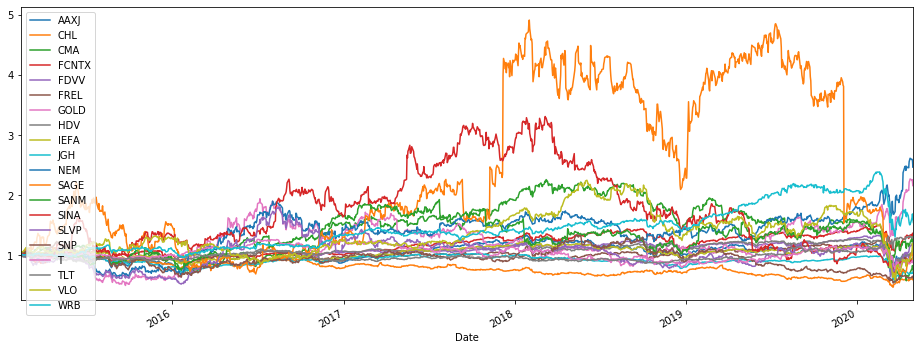

In [19]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(16,6))
plt.legend(loc=2);

# Resampling data from daily to monthly returns

In [20]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker           AAXJ        CHL        CMA  ...  \
Date                                         ...   
2015-02-28        NaN        NaN        NaN  ...   
2015-03-31  64.000000  65.029999  45.130001  ...   
2015-04-30  68.110001  71.430000  47.410000  ...   
2015-05-31  68.110001  71.430000  47.410000  ...   
2015-06-30  63.000000  64.089996  51.320000  ...   

Ticker             TLT        VLO        WRB  
Date                                          
2015-02-28         NaN        NaN        NaN  
2015-03-31  130.690002  63.619999  33.673332  
2015-04-30  125.949997  56.900002  32.660000  
2015-05-31  125.949997  56.900002  32.660000  
2015-06-30  117.459999  62.599998  34.619999  

[5 rows x 20 columns]

In [21]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker          AAXJ       CHL       CMA  ...       TLT  \
Date                                      ...             
2015-02-28       NaN       NaN       NaN  ...       NaN   
2015-03-31       NaN       NaN       NaN  ...       NaN   
2015-04-30  0.064219  0.098416  0.050521  ... -0.036269   
2015-05-31  0.000000  0.000000  0.000000  ...  0.000000   
2015-06-30 -0.075026 -0.102758  0.082472  ... -0.067408   

Ticker           VLO       WRB  
Date                            
2015-02-28       NaN       NaN  
2015-03-31       NaN       NaN  
2015-04-30 -0.105627 -0.030093  
2015-05-31  0.000000  0.000000  
2015-06-30  0.100176  0.060012  

[5 rows x 20 columns]

In [22]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker          AAXJ       CHL       CMA  ...       TLT  \
Date                                      ...             
2015-02-28       NaN       NaN       NaN  ...       NaN   
2015-03-31       NaN       NaN       NaN  ...       NaN   
2015-04-30  1.064219  1.098416  1.050521  ...  0.963731   
2015-05-31  1.064219  1.098416  1.050521  ...  0.963731   
2015-06-30  0.984375  0.985545  1.137159  ...  0.898768   

Ticker           VLO       WRB  
Date                            
2015-02-28       NaN       NaN  
2015-03-31       NaN       NaN  
2015-04-30  0.894373  0.969907  
2015-05-31  0.894373  0.969907  
2015-06-30  0.983967  1.028113  

[5 rows x 20 columns]

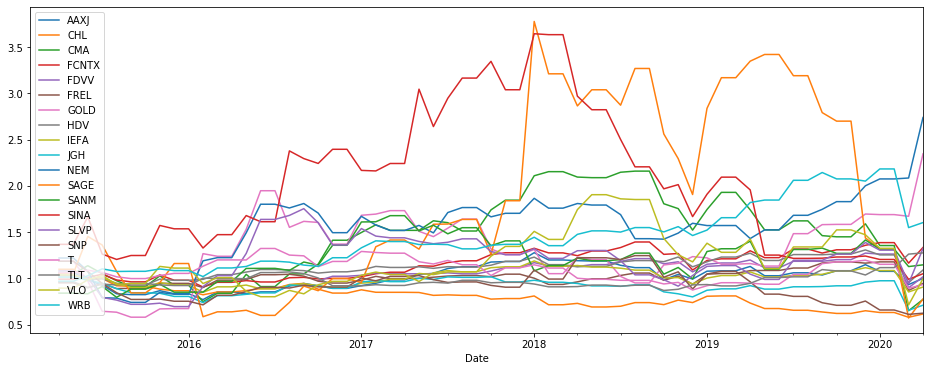

In [44]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(16,6))
plt.legend(loc=2);

# Analyzing distribution of returns

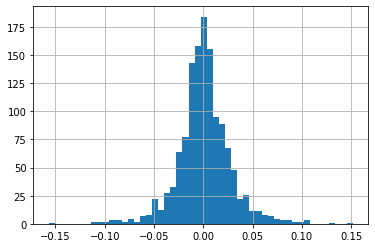

In [24]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc['GOLD']
aapl.hist(bins=50);

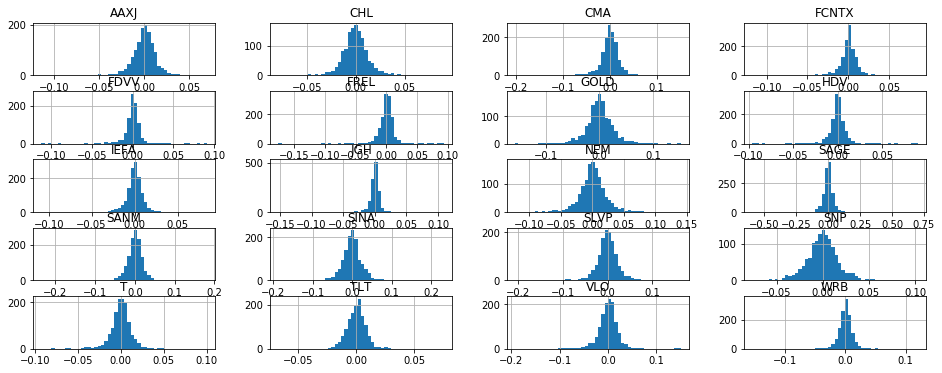

In [25]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(16,6));

# Performing moving average calculation

                Close  30_MA_Close  90_MA_Close
Date                                           
2015-02-11  11.940000          NaN          NaN
2015-02-12  12.130000          NaN          NaN
2015-02-13  12.140000          NaN          NaN
2015-02-17  12.030000          NaN          NaN
2015-02-18  12.230000          NaN          NaN
...               ...          ...          ...
2020-04-27  26.930000    21.203333    19.608667
2020-04-28  26.959999    21.557667    19.715000
2020-04-29  26.549999    21.852333    19.810778
2020-04-30  25.719999    22.180333    19.899778
2020-05-01  26.930000    22.542000    20.005111

[1315 rows x 3 columns]

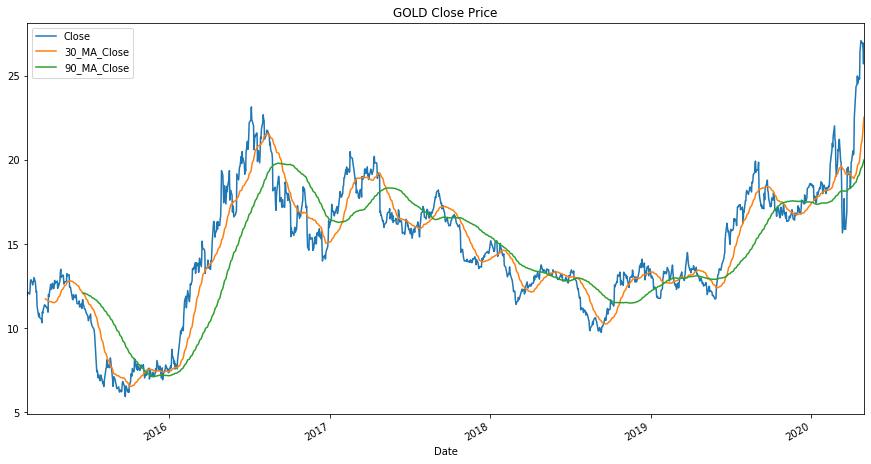

In [48]:
# extract just GOLD close
gold_close = close_px[['GOLD']]['GOLD']
# calculate the 30 and 90 day rolling means
ma_30 = gold_close.rolling(window=30).mean()
ma_90 = gold_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': gold_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="GOLD Close Price")
plt.gcf().set_size_inches(15,8)
result

# Comparision of average daily returns across stocks

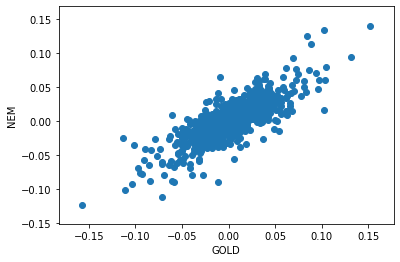

In [27]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc['GOLD'], daily_pc['NEM'])
plt.xlabel('GOLD')
plt.ylabel('NEM');

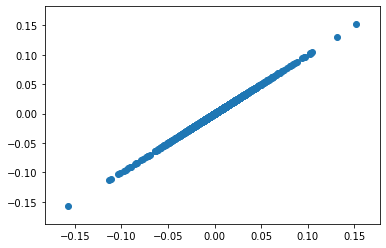

In [28]:
# demonstrate perfect correlation
plt.scatter(daily_pc['GOLD'], daily_pc['GOLD']);

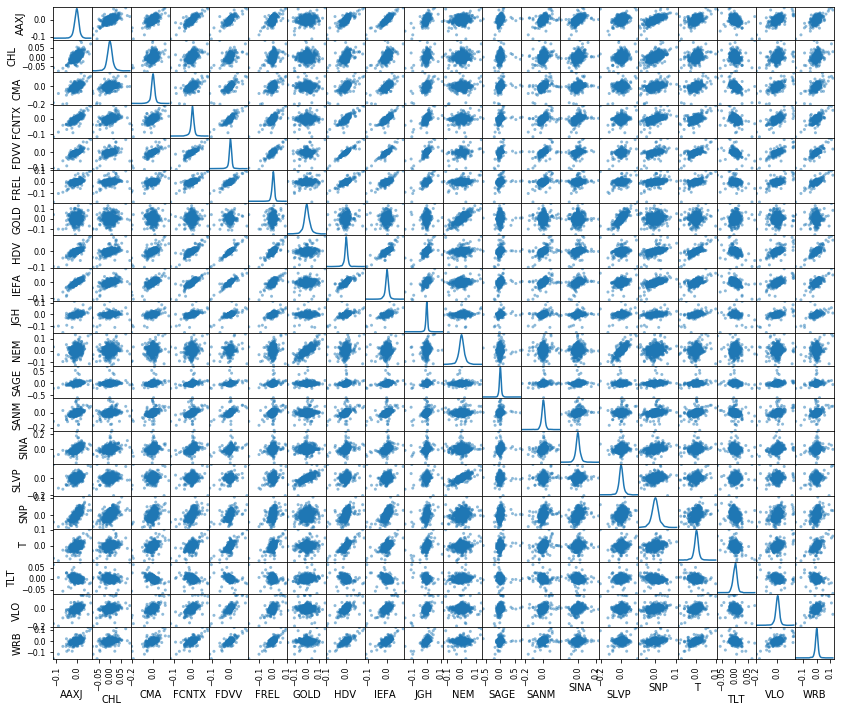

In [29]:
from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(14,12));

# Correlation of stocks based upon daily percentage change of closing price

In [30]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker      AAXJ       CHL       CMA  ...       TLT  \
Ticker                                ...             
AAXJ    1.000000  0.631856  0.580065  ... -0.305294   
CHL     0.631856  1.000000  0.365112  ... -0.125463   
CMA     0.580065  0.365112  1.000000  ... -0.454469   
FCNTX   0.773006  0.465550  0.600556  ... -0.364113   
FDVV    0.738410  0.453069  0.715764  ... -0.383300   
...          ...       ...       ...  ...       ...   
SNP     0.714862  0.538972  0.439503  ... -0.266585   
T       0.453079  0.275254  0.428974  ... -0.247637   
TLT    -0.305294 -0.125463 -0.454469  ...  1.000000   
VLO     0.535643  0.315184  0.535070  ... -0.229907   
WRB     0.536044  0.355024  0.583300  ... -0.315011   

Ticker       VLO       WRB  
Ticker                      
AAXJ    0.535643  0.536044  
CHL     0.315184  0.355024  
CMA     0.535070  0.583300  
FCNTX   0.588565  0.633932  
FDVV    0.704444  0.745916  
...          ...       ...  
SNP     0.376483  0.309100  
T       0.401060  0.538

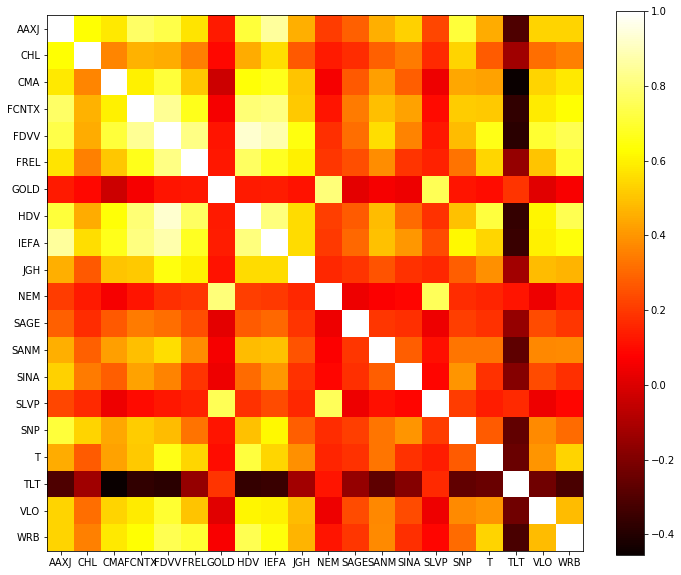

In [31]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(12,10)

# Volatility

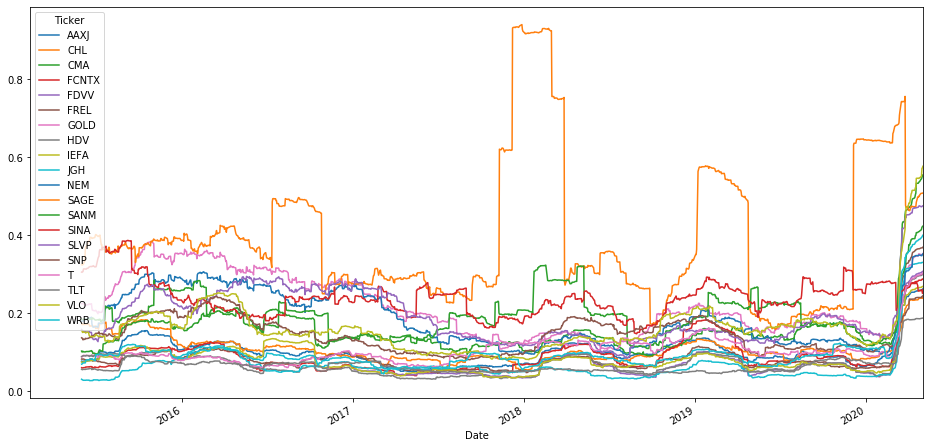

In [32]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot  
vol.plot(figsize=(16, 8));

# Determining risk relative to expected returns

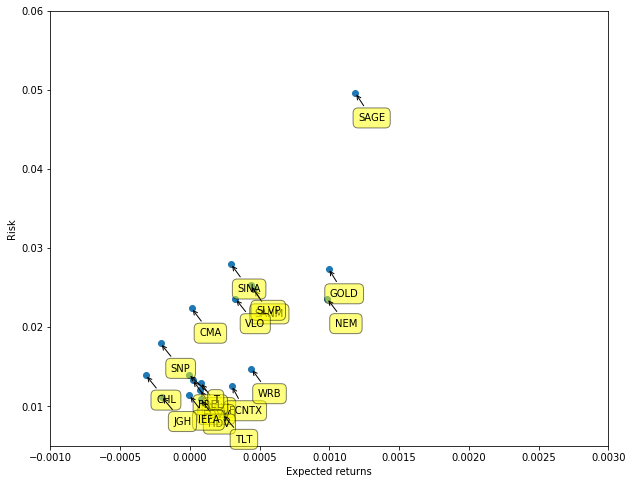

In [45]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0600)

# set size
plt.gcf().set_size_inches(10,8)